# O Algoritmo K-Means

1. Especificar a quantidade K de clusters
2. Inicalização aleatória de K centroids, ou seja, K pontos aleatórios do dataset
3. Cada um dos dados é rotulado baseado no centroid mais próximo, formando K grupos
4. Cálculo dos centroids desses novos grupos
5. Se houver mudança dos centroids, repetir passo 3. Se não, finalizar algoritmo.

Observação: para que não haja um número muito grande de iterações, isto é, que o passo não seja repetido muitas vezes sem muitos ganhos, é possível definir uma variável $R_{max}$ que finaliza a computação do algoritmo quando este chega ao número $R_{max}$ de iterações.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [ ]:
df = pd.read_csv('dermatology.data')

In [ ]:
df.columns = np.arange(0, 35)

In [ ]:
# aplicando pré-processamento à coluna 33, que está em formato de string,
# com alguns valoroes inconsistentes, transformando-os em inteiros
df[33] = df[33].apply(lambda x: x if x != '?' else '0').apply(int)

In [ ]:
X = df.drop(10, axis=1).values
y = df[10].values

Lembrando que:

$$ S_W=\sum_{ k=1 }^{ K }{ \sum _{ x\in { C }_{ k } }^{ }{ \left( x-{ \mu }_{ k } \right) { \left( x-{ \mu }_{ k } \right) }^{ T } } } $$

$$ S_B=\sum _{ k=1 }^{ K }{ N_k }{ \left( { \mu }_{ k }-{ \mu } \right) { \left( { \mu }_{ k }-{ \mu } \right) }^{ T } } $$

onde $K$ é o número de clusters, $x$ é um ponto no cluster $C_k$, $\mu_k$ é o centroid do cluster $C_k$, $N_k$ é o número de pontos no cluster $C_k$, $\mu$ é a média de todo o dataset.

In [ ]:
# índice de validação de cluster
def compute_J(kmeans, X):
  S_w = Sw(kmeans, X)
  S_b = Sb(kmeans, X)
  return np.trace(np.linalg.inv(S_w)*S_b)

# matriz de espalhamento intra-cluster
def Sw(kmeans, X):
  # distances = kmeans.transform(X)
  labels = kmeans.predict(X)
  centroids = kmeans.cluster_centers_

  Sw = np.zeros((X.shape[1], X.shape[1]))
  for i in range(X.shape[0]):
    a = X[i,:] - centroids[labels[i]]
    M = a.reshape(1, len(a))*a.reshape(len(a), 1)
    Sw = Sw + M

  return Sw

# matriz de espalhamento entre clusters
def Sb(kmeans, X):
  labels = kmeans.predict(X)
  centroids = kmeans.cluster_centers_
  Sb = np.zeros((X.shape[1], X.shape[1]))
  N = pd.Series(kmeans.labels_).value_counts()
  u = X.mean(axis=0)

  for i in range(X.shape[0]):
    N_i = N[labels[i]]
    u_k = centroids[labels[i]]
    a = u - u_k
    M = N_i*(a.reshape(1, len(a))*a.reshape(len(a), 1))
    M = N_i*M
    Sb = Sb + M

  return Sb

In [ ]:
Kmax = 15
Rmax = 30
J = []
k_values = np.arange(1, Kmax+1)
for k in k_values:
  model = KMeans(n_clusters=k, max_iter=Rmax, random_state=42)
  model.fit(X)
  J_k = compute_J(model, X)
  J.append(J_k)

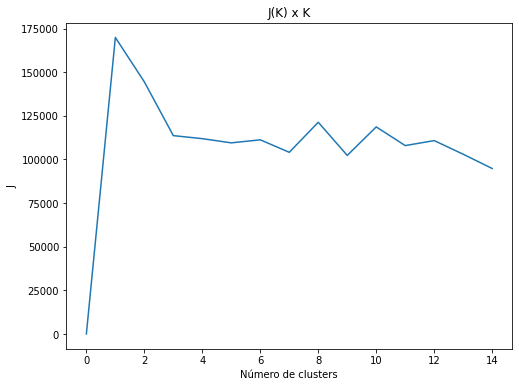

In [ ]:
plt.figure(figsize = (8, 6))
plt.plot(J)
# plt.xticks(k_values)
plt.xlabel('Número de clusters')
plt.ylabel('J')
plt.title('J(K) x K');